In [ ]:
#Jacobo Aristizábal, Isabella García y María Giraldo

#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy
from skfuzzy import control as ctrl
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [90]:
#Variables de entrada
#Cantidad de quejas
quejas = ctrl.Antecedent(np.arange(0, 61, 1), 'quejas')

#Número de transacciones
servicios = ctrl.Antecedent(np.arange(0, 11, 1), 'servicios')

#Tiempo
tiempo = ctrl.Antecedent(np.arange(0, 97, 1), 'tiempo')

In [91]:
#Variables de salida
retiros = ctrl.Consequent(np.arange(0, 11, 1), 'retiros')

In [92]:
#Conjuntos borrosos para las variables de entrada
tiempo['poco'] = skfuzzy.trimf(tiempo.universe, [0, 0, 30])
tiempo['medio'] = skfuzzy.trimf(tiempo.universe, [30, 30, 48])
tiempo['alto'] = skfuzzy.trimf(tiempo.universe, [48, 48, 96])

quejas['poco'] = skfuzzy.trimf(quejas.universe, [0, 15, 15])
quejas['medio'] = skfuzzy.trimf(quejas.universe, [15, 45, 45])
quejas['alto'] = skfuzzy.trimf(quejas.universe, [45, 60, 60])

servicios['poco'] = skfuzzy.trimf(servicios.universe, [0, 0, 3])
servicios['medio'] = skfuzzy.trimf(servicios.universe, [3, 3, 7])
servicios['alto'] = skfuzzy.trimf(servicios.universe, [7, 7, 10])

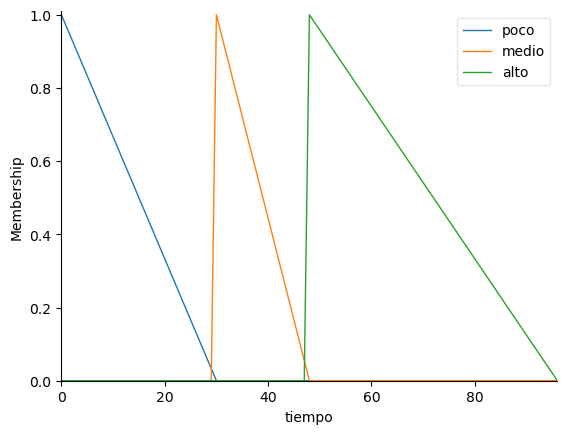

In [93]:
#Visualizar conjuntos borrosos
tiempo.view()
plt.show()

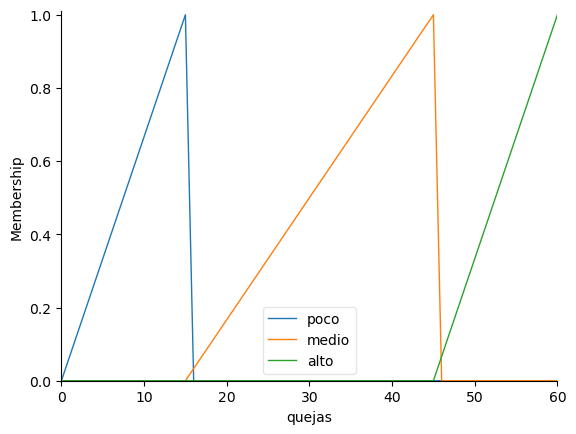

In [94]:
quejas.view()
plt.show()

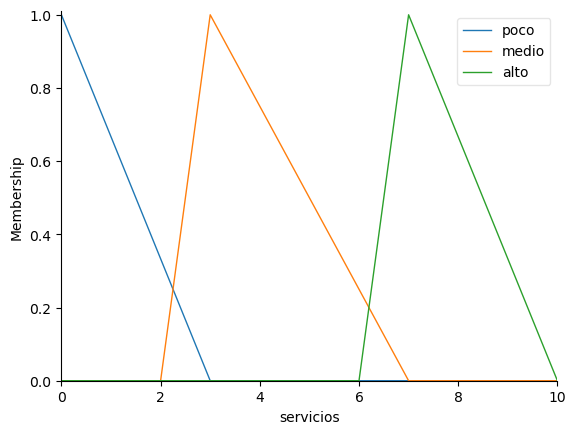

In [95]:
servicios.view()
plt.show()

In [96]:
#Conjuntos borrosos de salida
retiros['poco'] = skfuzzy.trimf(retiros.universe,[0, 0, 3])
retiros['medio'] = skfuzzy.trimf(retiros.universe, [3, 5, 7])
retiros['alto'] = skfuzzy.trimf(retiros.universe,[7, 10, 10])

In [97]:
#Reglas
r1 = ctrl.Rule(tiempo['poco'] & quejas['alto'] & servicios['poco'], retiros['alto'])
r2 = ctrl.Rule(tiempo['medio'] & quejas['medio'] & servicios['medio'], retiros['medio'])
r3 = ctrl.Rule(tiempo['alto'] & quejas['poco'] & servicios['alto'], retiros['poco'])
r4 = ctrl.Rule(tiempo['alto'] & quejas['poco'] & servicios['medio'], retiros['poco'])
r5 = ctrl.Rule(tiempo['medio'] & quejas['poco'] & servicios['alto'], retiros['poco'])
r6 = ctrl.Rule(tiempo['medio'] & quejas['alto'] & servicios['poco'], retiros['alto'])
r7 = ctrl.Rule(tiempo['alto'] & quejas['alto'] & servicios['poco'], retiros['alto'])
r8 = ctrl.Rule(tiempo['poco'] & quejas['poco'] & servicios['poco'], retiros['alto'])

In [98]:
#Modelo 1
mesesAbonados = 12
cantQuejas = 10
numServicios = 3

#Función
def tri(x, a, b, c):
    return np.fmax(0, np.fmin((x-a)/(b-a), (c-x)/(c-b)))

#Tiempo
re1 = tri(mesesAbonados, 0, 30, 48)
re2 = tri(mesesAbonados, 30, 48, 96)


#Quejas
re3 = tri(cantQuejas, 0, 15, 45)
re4 = tri(cantQuejas, 15, 45, 60)

#Servicios
re5 = tri(numServicios, 0, 3, 7)
re6 = tri(numServicios, 3, 7, 10)

#Retiros
ret1 = min(re1, re3, re5)
ret2 = min(re1, re3, re6)
ret3 = min(re1, re4, re5)
ret4 = min(re1, re4, re6)
ret5 = min(re2, re3, re5)
ret6 = min(re2, re3, re6)
ret7 = min(re2, re4, re5)
ret8 = min(re2, re4, re6)

In [99]:
#Grado pertenencia
pertAlto = skfuzzy.interp_membership(retiros.universe, retiros['alto'].mf, resultado)
pertMedio = skfuzzy.interp_membership(retiros.universe, retiros['medio'].mf, resultado)
perTPoco = skfuzzy.interp_membership(retiros.universe, retiros['poco'].mf, resultado)

#Defuzz con centroide
centroide = skfuzzy.defuzz(retiros.universe, resultado, 'centroid')

# Imprimiendo el resultado
print("Retiros esperados: ", centroide)


AssertionError: Length of x and fuzzy membership function must be                           identical.

In [ ]:
#Modelo 2
mesesAbonados = 20
cantQuejas = 60
numServicios = 5

#Función
def tri(x, a, b, c):
    return np.fmax(0, np.fmin((x-a)/(b-a), (c-x)/(c-b)))

#Tiempo
re1 = tri(mesesAbonados, 0, 30, 48)
re2 = tri(mesesAbonados, 30, 48, 96)


#Quejas
re3 = tri(cantQuejas, 0, 15, 45)
re4 = tri(cantQuejas, 15, 45, 60)

#Servicios
re5 = tri(numServicios, 0, 3, 7)
re6 = tri(numServicios, 3, 7, 10)

#Retiros
ret1 = min(re1, re3, re5)
ret2 = min(re1, re3, re6)
ret3 = min(re1, re4, re5)
ret4 = min(re1, re4, re6)
ret5 = min(re2, re3, re5)
ret6 = min(re2, re3, re6)
ret7 = min(re2, re4, re5)
ret8 = min(re2, re4, re6)

In [ ]:
#Grado pertenencia
pertAlto = skfuzzy.interp_membership(retiros.universe, retiros['alto'].mf, resultado)
pertMedio = skfuzzy.interp_membership(retiros.universe, retiros['medio'].mf, resultado)
perTPoco = skfuzzy.interp_membership(retiros.universe, retiros['poco'].mf, resultado)

#Defuzz con centroide
centroide = skfuzzy.defuzz(retiros.universe, resultado, 'centroid')

# Imprimiendo el resultado
print("Retiros esperados: ", centroide)

In [ ]:
#Modelo 3
mesesAbonados = 40
cantQuejas = 15
numServicios = 8

#Función
def tri(x, a, b, c):
    return np.fmax(0, np.fmin((x-a)/(b-a), (c-x)/(c-b)))

#Tiempo
re1 = tri(mesesAbonados, 0, 30, 48)
re2 = tri(mesesAbonados, 30, 48, 96)


#Quejas
re3 = tri(cantQuejas, 0, 15, 45)
re4 = tri(cantQuejas, 15, 45, 60)

#Servicios
re5 = tri(numServicios, 0, 3, 7)
re6 = tri(numServicios, 3, 7, 10)

#Retiros
ret1 = min(re1, re3, re5)
ret2 = min(re1, re3, re6)
ret3 = min(re1, re4, re5)
ret4 = min(re1, re4, re6)
ret5 = min(re2, re3, re5)
ret6 = min(re2, re3, re6)
ret7 = min(re2, re4, re5)
ret8 = min(re2, re4, re6)

In [ ]:
#Grado pertenencia
pertAlto = skfuzzy.interp_membership(retiros.universe, retiros['alto'].mf, resultado)
pertMedio = skfuzzy.interp_membership(retiros.universe, retiros['medio'].mf, resultado)
perTPoco = skfuzzy.interp_membership(retiros.universe, retiros['poco'].mf, resultado)

#Defuzz con centroide
centroide = skfuzzy.defuzz(retiros.universe, resultado, 'centroid')

# Imprimiendo el resultado
print("Retiros esperados: ", centroide)

In [ ]:
#Modelo 4
mesesAbonados = 62
cantQuejas = 40
numServicios = 6

#Función
def tri(x, a, b, c):
    return np.fmax(0, np.fmin((x-a)/(b-a), (c-x)/(c-b)))

#Tiempo
re1 = tri(mesesAbonados, 0, 30, 48)
re2 = tri(mesesAbonados, 30, 48, 96)


#Quejas
re3 = tri(cantQuejas, 0, 15, 45)
re4 = tri(cantQuejas, 15, 45, 60)

#Servicios
re5 = tri(numServicios, 0, 3, 7)
re6 = tri(numServicios, 3, 7, 10)

#Retiros
ret1 = min(re1, re3, re5)
ret2 = min(re1, re3, re6)
ret3 = min(re1, re4, re5)
ret4 = min(re1, re4, re6)
ret5 = min(re2, re3, re5)
ret6 = min(re2, re3, re6)
ret7 = min(re2, re4, re5)
ret8 = min(re2, re4, re6)

In [ ]:
#Grado pertenencia
pertAlto = skfuzzy.interp_membership(retiros.universe, retiros['alto'].mf, resultado)
pertMedio = skfuzzy.interp_membership(retiros.universe, retiros['medio'].mf, resultado)
perTPoco = skfuzzy.interp_membership(retiros.universe, retiros['poco'].mf, resultado)

#Defuzz con centroide
centroide = skfuzzy.defuzz(retiros.universe, resultado, 'centroid')

# Imprimiendo el resultado
print("Retiros esperados: ", centroide)